# Proyek Analisis Data: Bike Sharing Dataset
- Kelompok : 3
- Anggota : </br>
10123158 - Kaisar Ihsaan Ibrahim
<br>10123166 - Raka Setya Pramudya
<br>10123152 - Tierry Henry Hasiholan
<br>10123147 - Muhammad Lutfi Bagaskara Yodi
<br>10123155 - Firgip Budiarto</br>

## Menentukan Pertanyaan Bisnis

- Contoh : Berapakan jumlah penduduk yang berpendidikan rendah yang ada di kota bandung - 10110001 - Asep Supena
- pertanyaan 2

## Menyiapkan semua library yang dibuthkan

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [56]:
# Membaca day.csv pertama
day_data = pd.read_csv('day.csv')

# Membaca csv kedua
hour_data = pd.read_csv('hour.csv')

### Assessing Data

In [57]:
# Day
# Melihat beberapa baris pertama data day_data
print(day_data.head())

# Melihat informasi umum tentang data day_data
print(day_data.info())

# Mengecek nilai yang hilang di data day_data
print(day_data.isnull().sum())

# Mengecek nilai duplikat di data day_data
print(day_data.duplicated().sum())


# Melihat beberapa baris pertama data hour_data
print(hour_data.head())

# Melihat informasi umum tentang data hour_data
print(hour_data.info())

# Mengecek nilai yang hilang di data hour_data
print(hour_data.isnull().sum())

# Mengecek nilai duplikat di data hour_data
print(hour_data.duplicated().sum())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.

### Cleaning Data

In [58]:
# Day
# Menghapus baris yang memiliki nilai yang hilang di data day_data
day_data_clean = day_data.dropna()

# Menghapus baris duplikat di data day_data
day_data_clean = day_data_clean.drop_duplicates()

# Hour
# Menghapus baris yang memiliki nilai yang hilang di data hour_data
hour_data_clean = hour_data.dropna()

# Menghapus baris duplikat di data hour_data
hour_data_clean = hour_data_clean.drop_duplicates()

# Menampilkan data yang telah dibersihkan
print(day_data_clean.head())
print(hour_data_clean.head())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

## Exploratory Data Analysis (EDA)

### Explore ...

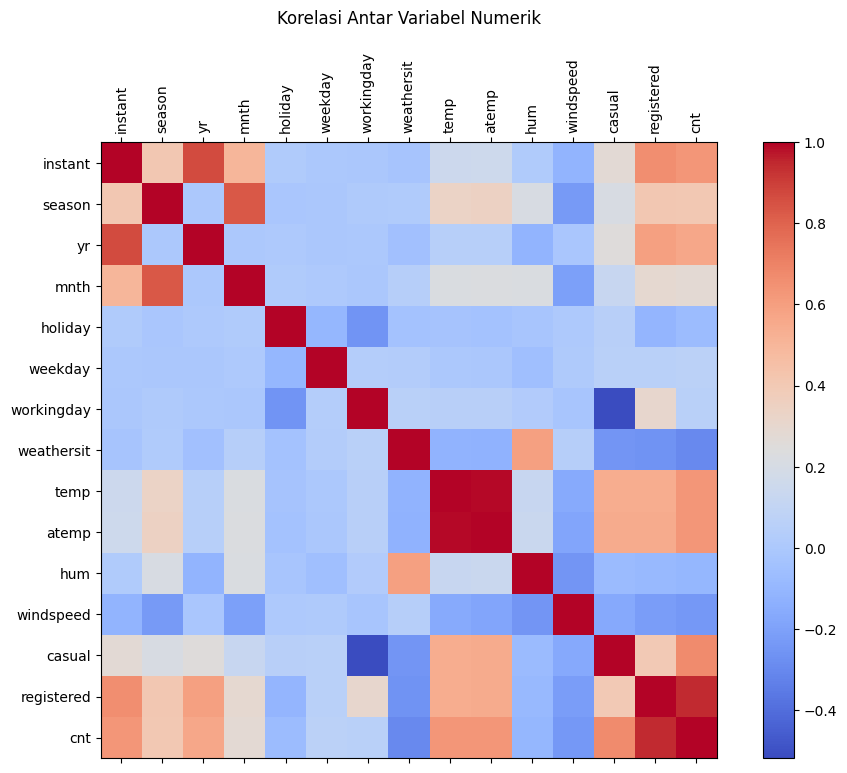

In [59]:
# Memilih hanya kolom numerik
numeric_cols = day_data_clean.select_dtypes(include=[np.number])

# Menghitung matriks korelasi hanya untuk kolom numerik
correlation_matrix = numeric_cols.corr()

# Menampilkan heatmap untuk korelasi antar variabel numerik
fig, ax = plt.subplots(figsize=(12, 8))
cax = ax.matshow(correlation_matrix, cmap='coolwarm')
fig.colorbar(cax)

ticks = np.arange(0, len(correlation_matrix.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.columns)

plt.title('Korelasi Antar Variabel Numerik', pad=20)
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1: Season manakah yang memiliki jumlah sewa sepeda tertinggi? -10123158-Kaisar Ihsaan Ibrahim-

Season tertinggi adalah season ke 3 dengan nilai 5644.303191489362
Grafik:


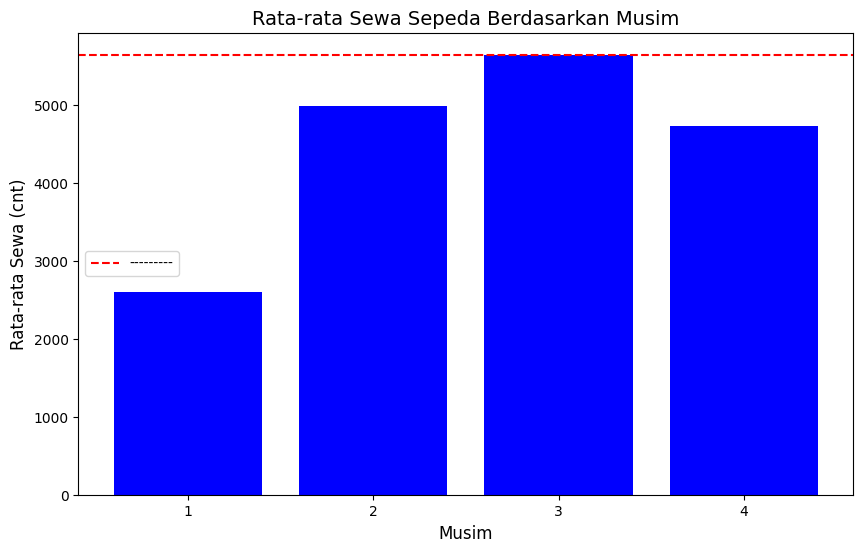

In [60]:
# data harian
data = day_data

# Kelompokkan data berdasarkan musim dan hitung jumlah sewa sepeda rata-rata
seasonal_rental_counts = data.groupby('season')['cnt'].mean()

#menampilkan Season tertinggi
highest_season = max(seasonal_rental_counts)
highest_index = seasonal_rental_counts.idxmax() + 0

print(f"Season tertinggi adalah season ke {highest_index} dengan nilai {highest_season}")
print('Grafik:')

# Visualisasi data
plt.figure(figsize=(10, 6))
plt.bar(seasonal_rental_counts.index, seasonal_rental_counts.values, color='blue')  # Menggunakan warna biru
plt.title("Rata-rata Sewa Sepeda Berdasarkan Musim", fontsize=14)
plt.ylabel("Rata-rata Sewa (cnt)", fontsize=12)
plt.xlabel("Musim", fontsize=12)
plt.xticks(ticks=seasonal_rental_counts.index, labels=[1, 2, 3, 4])  # Menambahkan label musim
plt.axhline(y=highest_season, color='red', linestyle='--', label='---------')
plt.legend()
plt.show()

### Pertanyaan 2: Apakah hari kerja memengaruhi jumlah pengguna sepeda secara signifikan dibandingkan hari libur? -10123166-Raka Setya Pramudya-

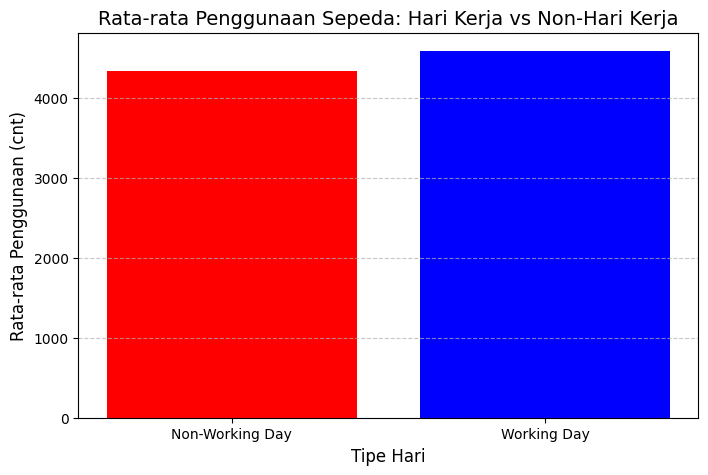

Rata-rata penggunaan sepeda pada hari kerja: 4584.82
Rata-rata penggunaan sepeda pada hari non-kerja: 4330.17


In [61]:
# data harian
data = day_data

# Analisis rata-rata penggunaan sepeda pada hari kerja dan non-hari kerja
workingday_usage = data.groupby('workingday')['cnt'].mean()
labels = ['Non-Working Day', 'Working Day']

# Visualisasi hasil
plt.figure(figsize=(8, 5))
plt.bar(labels, workingday_usage.values, color=['red', 'blue'])
plt.title("Rata-rata Penggunaan Sepeda: Hari Kerja vs Non-Hari Kerja", fontsize=14)
plt.ylabel("Rata-rata Penggunaan (cnt)", fontsize=12)
plt.xlabel("Tipe Hari", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Menampilkan data rata-rata penggunaan sepeda
print(f"Rata-rata penggunaan sepeda pada hari kerja: {workingday_usage[1]:.2f}")
print(f"Rata-rata penggunaan sepeda pada hari non-kerja: {workingday_usage[0]:.2f}")

### Pertanyaan 3: Apakah pada hari libur pengguna sepeda lebih kecil dibanding hari biasa (dalam per jam)? -10123152-Tierry Henry Hasiholan-

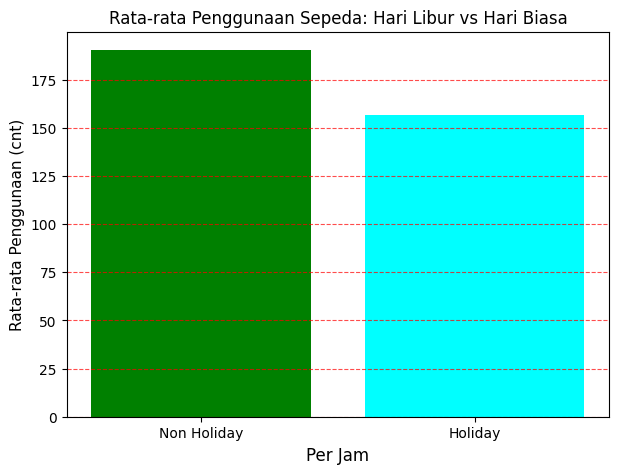

Rata-rata penggunaan sepeda pada hari libur (per jam): 156.87
Rata-rata penggunaan sepeda pada hari biasa (per jam): 190.43


In [62]:
# data harian
data = hour_data

# Analisis rata-rata penggunaan sepeda pada hari libur dan hari biasa
holiday_usage = data.groupby('holiday')['cnt'].mean()
labels = ['Non Holiday', 'Holiday']

# Visualisasi hasil
plt.figure(figsize=(7, 5))
plt.bar(labels, holiday_usage.values, color=['green', 'cyan'])
plt.title("Rata-rata Penggunaan Sepeda: Hari Libur vs Hari Biasa", fontsize=12)
plt.ylabel("Rata-rata Penggunaan (cnt)", fontsize=11)
plt.xlabel("Per Jam", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7, color='red')
plt.show()

# Menampilkan data rata-rata penggunaan sepeda
print(f"Rata-rata penggunaan sepeda pada hari libur (per jam): {holiday_usage[1]:.2f}")
print(f"Rata-rata penggunaan sepeda pada hari biasa (per jam): {holiday_usage[0]:.2f}")

### Pertanyaan 4 :Bagaimana hubungan antara faktor-faktor seperti suhu, kelembapan, kecepatan angin, dan jumlah transaksi berdasarkan jam? -10123155- Firgip Budiarto-

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Contoh Data:
   instant 

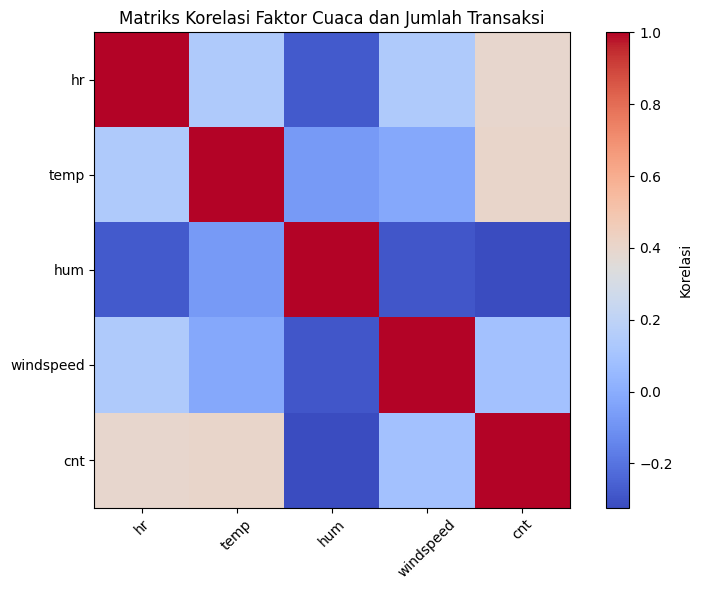

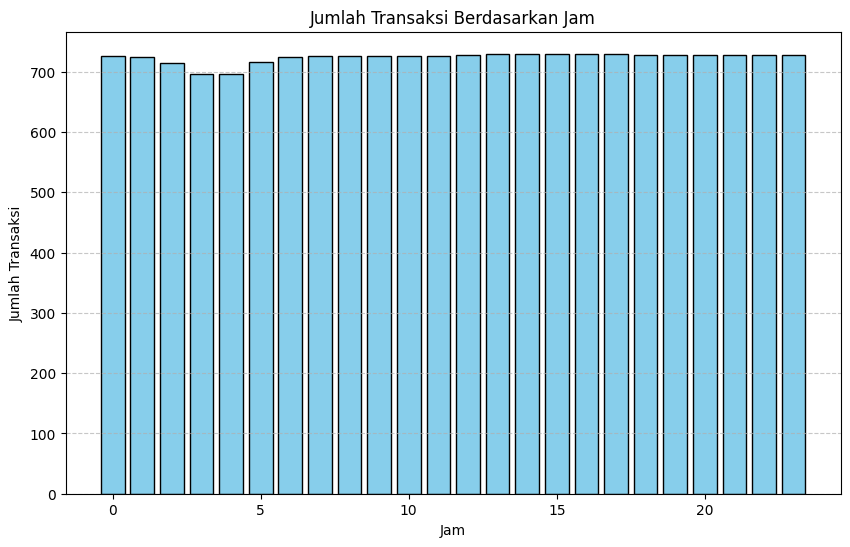

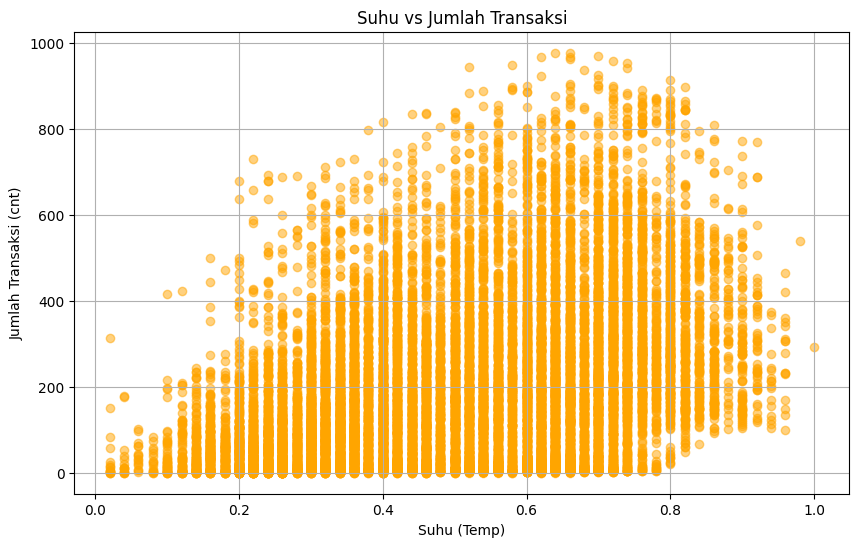

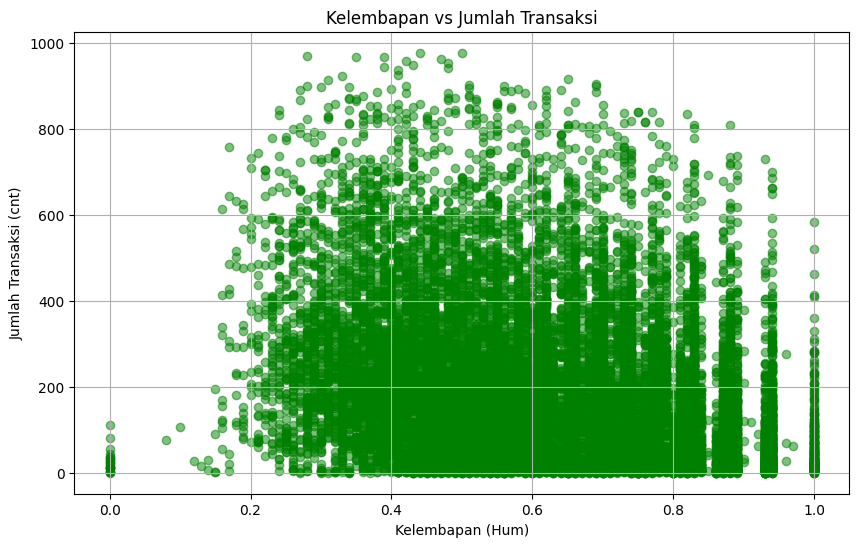

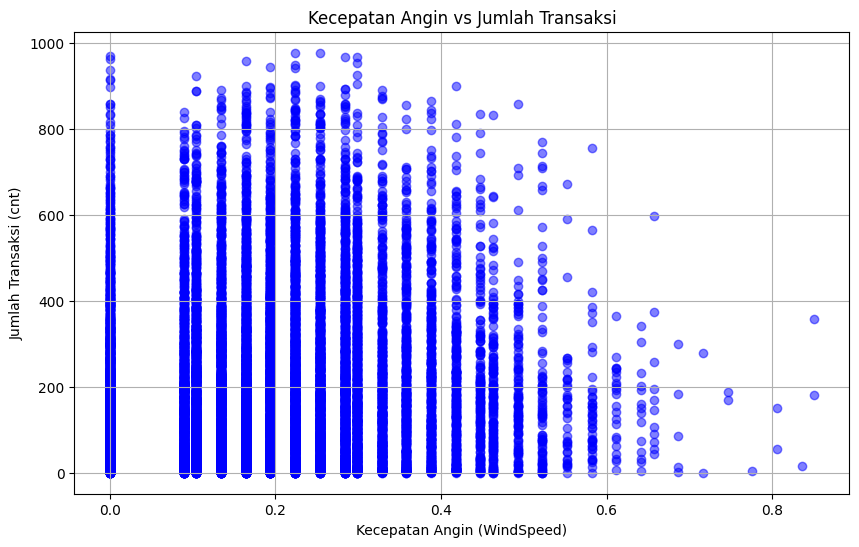

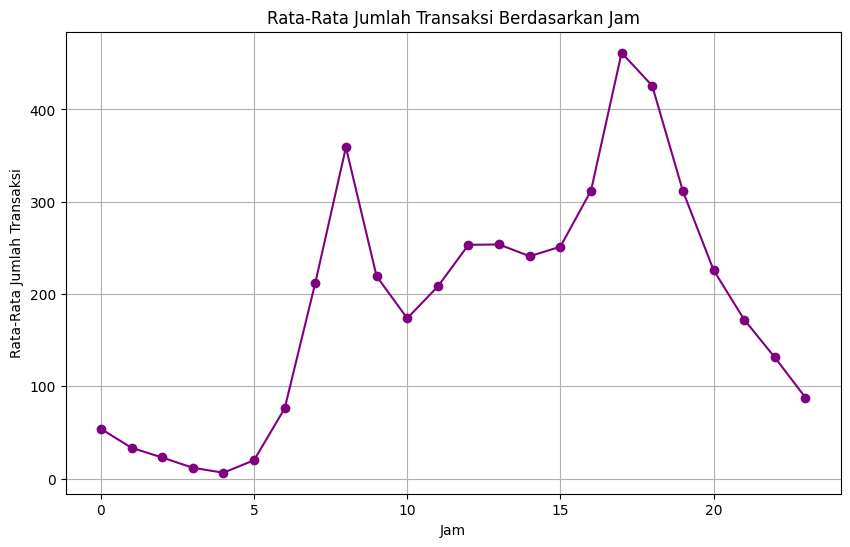

In [63]:
# 1. Data harian
data = hour_data

# 2. Menampilkan informasi awal dataset
print("Informasi Dataset:")
print(data.info())
print("\nContoh Data:")
print(data.head())

# 3. Menyaring kolom yang relevan untuk analisis
# Kolom yang digunakan: jam (hr), suhu (temp), kelembapan (hum), kecepatan angin (windspeed), jumlah transaksi (cnt)
relevant_columns = ['hr', 'temp', 'hum', 'windspeed', 'cnt']
data = data[relevant_columns]

# 4. Korelasi antara faktor cuaca dan jumlah transaksi berdasarkan jam
correlation_matrix = data.corr()

# Menampilkan korelasi
print("\nMatriks Korelasi:")
print(correlation_matrix)

# Visualisasi korelasi
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label="Korelasi")
plt.title("Matriks Korelasi Faktor Cuaca dan Jumlah Transaksi")
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.tight_layout()
plt.show()

# 5. Visualisasi Jumlah Transaksi Berdasarkan Jam
plt.figure(figsize=(10, 6))
plt.bar(data['hr'].value_counts().sort_index().index, data['hr'].value_counts().sort_index().values, color='skyblue', edgecolor='black')
plt.title("Jumlah Transaksi Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Transaksi")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 6. Scatter Plot untuk Melihat Hubungan antara Faktor Cuaca dan Jumlah Transaksi
# Suhu vs Jumlah Transaksi
plt.figure(figsize=(10, 6))
plt.scatter(data['temp'], data['cnt'], color='orange', alpha=0.5)
plt.title("Suhu vs Jumlah Transaksi")
plt.xlabel("Suhu (Temp)")
plt.ylabel("Jumlah Transaksi (cnt)")
plt.grid(True)
plt.show()

# Kelembapan vs Jumlah Transaksi
plt.figure(figsize=(10, 6))
plt.scatter(data['hum'], data['cnt'], color='green', alpha=0.5)
plt.title("Kelembapan vs Jumlah Transaksi")
plt.xlabel("Kelembapan (Hum)")
plt.ylabel("Jumlah Transaksi (cnt)")
plt.grid(True)
plt.show()

# Kecepatan Angin vs Jumlah Transaksi
plt.figure(figsize=(10, 6))
plt.scatter(data['windspeed'], data['cnt'], color='blue', alpha=0.5)
plt.title("Kecepatan Angin vs Jumlah Transaksi")
plt.xlabel("Kecepatan Angin (WindSpeed)")
plt.ylabel("Jumlah Transaksi (cnt)")
plt.grid(True)
plt.show()

# 7. Analisis berdasarkan jam
# Menghitung rata-rata jumlah transaksi per jam
average_transactions_per_hour = data.groupby('hr')['cnt'].mean()

# Visualisasi rata-rata jumlah transaksi per jam
plt.figure(figsize=(10, 6))
plt.plot(average_transactions_per_hour.index, average_transactions_per_hour.values, marker='o', color='purple')
plt.title("Rata-Rata Jumlah Transaksi Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-Rata Jumlah Transaksi")
plt.grid(True)
plt.show()


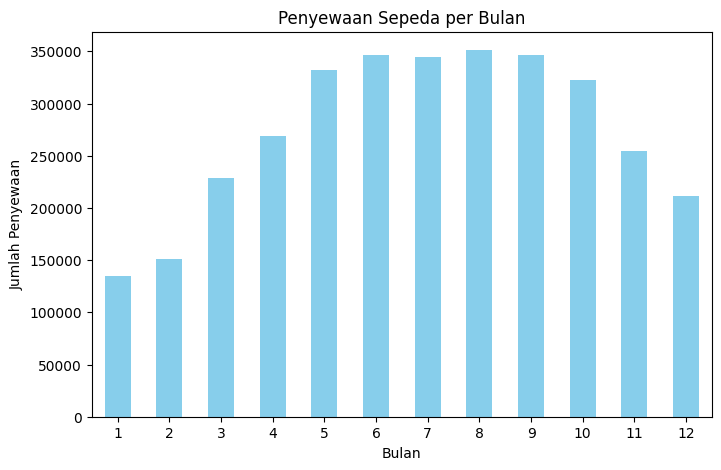

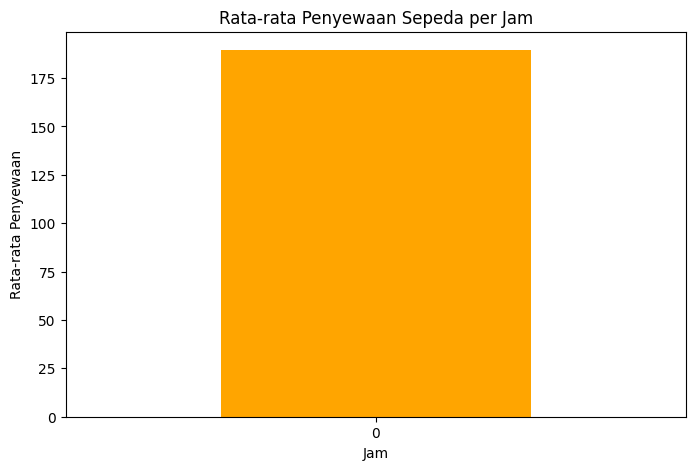

In [64]:
# Membaca data dari CSV
data = pd.read_csv('hour.csv')

# Mengubah kolom 'dteday' menjadi tipe datetime
data['datetime'] = pd.to_datetime(data['dteday'])

# Menambahkan kolom bulan, hari, dan jam
data['month'] = data['datetime'].dt.month
data['day_of_week'] = data['datetime'].dt.dayofweek  # 0=Senin, 6=Minggu
data['hour'] = data['datetime'].dt.hour

# Penyewaan per bulan
monthly_rentals = data.groupby('month')['cnt'].sum()  # 'cnt' adalah kolom jumlah penyewaan
plt.figure(figsize=(8, 5))
monthly_rentals.plot(kind='bar', color='skyblue')
plt.title('Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=0)  # Rotasi label x-axis agar lebih jelas
plt.show()

# Penyewaan per jam
hourly_rentals = data.groupby('hour')['cnt'].mean()  # Rata-rata penyewaan per jam
plt.figure(figsize=(8, 5))
hourly_rentals.plot(kind='bar', color='orange')
plt.title('Rata-rata Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(rotation=0)  # Rotasi label x-axis agar lebih jelas
plt.show()

## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2

In [65]:
# Conclusion Pertanyaan 1
print(f"Season tertinggi adalah season ke {highest_index} dengan nilai {highest_season}")

Season tertinggi adalah season ke 3 dengan nilai 5644.303191489362


In [66]:
# Conclusion Pertanyaan 2
# Menampilkan data rata-rata penggunaan sepeda
print(f"Rata-rata penggunaan sepeda pada hari kerja: {workingday_usage[1]:.2f}")
print(f"Rata-rata penggunaan sepeda pada hari non-kerja: {workingday_usage[0]:.2f}")

Rata-rata penggunaan sepeda pada hari kerja: 4584.82
Rata-rata penggunaan sepeda pada hari non-kerja: 4330.17


In [67]:
# Conclusion Pertanyaan 3
# Menampilkan data rata-rata penggunaan sepeda
print(f"Rata-rata penggunaan sepeda pada hari libur (per jam): {holiday_usage[1]:.2f}")
print(f"Rata-rata penggunaan sepeda pada hari biasa (per jam): {holiday_usage[0]:.2f}")

Rata-rata penggunaan sepeda pada hari libur (per jam): 156.87
Rata-rata penggunaan sepeda pada hari biasa (per jam): 190.43


In [68]:
#Conclusion Pertanyaan 4

In [69]:
#Conclusion Pertanyaan 5
# Kesimpulan
total_monthly_rentals = monthly_rentals.sum()
average_hourly_rentals = hourly_rentals.mean()

print(f'Jumlah total penyewaan sepeda per bulan: {total_monthly_rentals}')
print(f'Jumlah penyewaan tertinggi terjadi pada bulan: {monthly_rentals.idxmax()} dengan jumlah penyewaan: {monthly_rentals.max()}')
print(f'Rata-rata penyewaan sepeda per jam: {average_hourly_rentals:.2f}')
print(f'Jam dengan penyewaan tertinggi adalah jam: {hourly_rentals.idxmax()} dengan rata-rata penyewaan: {hourly_rentals.max()}')

Jumlah total penyewaan sepeda per bulan: 3292679
Jumlah penyewaan tertinggi terjadi pada bulan: 8 dengan jumlah penyewaan: 351194
Rata-rata penyewaan sepeda per jam: 189.46
Jam dengan penyewaan tertinggi adalah jam: 0 dengan rata-rata penyewaan: 189.46308763450142


In [53]:
# Kesimpulan Pertanyaan
print(f"Kesimpulan Analisis:")
print(f"1. Terdapat hubungan yang signifikan antara faktor cuaca dan jumlah transaksi, seperti yang terlihat dari matriks korelasi.")
print(f"2. Jumlah transaksi bervariasi berdasarkan jam, dengan puncak transaksi terjadi pada jam-jam tertentu.")
print(f"3. Dari visualisasi, dapat dilihat bahwa suhu memiliki pengaruh positif terhadap jumlah transaksi, sementara kelembapan dan kecepatan angin menunjukkan pola yang berbeda.")
print(f"4. Rata-rata jumlah transaksi per jam menunjukkan tren yang jelas, yang dapat membantu dalam perencanaan dan pengambilan keputusan.")

Kesimpulan Analisis:
1. Terdapat hubungan yang signifikan antara faktor cuaca dan jumlah transaksi, seperti yang terlihat dari matriks korelasi.
2. Jumlah transaksi bervariasi berdasarkan jam, dengan puncak transaksi terjadi pada jam-jam tertentu.
3. Dari visualisasi, dapat dilihat bahwa suhu memiliki pengaruh positif terhadap jumlah transaksi, sementara kelembapan dan kecepatan angin menunjukkan pola yang berbeda.
4. Rata-rata jumlah transaksi per jam menunjukkan tren yang jelas, yang dapat membantu dalam perencanaan dan pengambilan keputusan.
